<a href="https://colab.research.google.com/github/JARACH-209/AI-ML_Lab/blob/master/ML_Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Single Layer Perceptron for OR and AND problem 
###Achal Dixit | 1801007

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import numpy as np

class SLP(object):
    def __init__(self,learning_rate, epochs):
        self.w = None
        self.b = None
        self.epochs = epochs
        self.learning_rate = learning_rate
        #self.weights = np.zeros(num_inputs + 1)    #intializing weights as 0, -0.3<w<0.3
    
    def model(self,x):
       # sum = np.dot(inputs, self.weights[1:]) + self.weights[0]
       # return 1 if  sum >0 else 0
       return 1 if (np.dot(self.w, x) >= self.b) else 0
    
    def predict(self,X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)

            
    def fit(self, X, Y):
        self.w = np.zeros(X.shape[1])
        self.b = 0
        accuracy = {}
        max_accuracy = 0
        wt_matrix = []
        #for all epochs
        for i in range(self.epochs):
            for x, y in zip(X, Y):
                y_pred = self.model(x)
                if y == 1 and y_pred == 0:
                    self.w = self.w + self.learning_rate * x
                    self.b = self.b - self.learning_rate * 1
                elif y == 0 and y_pred == 1:
                    self.w = self.w - self.learning_rate * x
                    self.b = self.b + self.learning_rate * 1
                
            wt_matrix.append(self.w)    
            accuracy[i] = accuracy_score(self.predict(X), Y)
            if (accuracy[i] > max_accuracy):
                max_accuracy = accuracy[i]
                chkptw = self.w
                chkptb = self.b
        return accuracy
'''
    def train(self,X,Y):
        for _ in range(self.iterations):
            for x,y in zip(X,Y):
                predicted  = self.predict(x)
                self.weights[1:] = self.learning_rate * (y-predicted) * x       #no need to check for the correct prediction as (y-preicted) = 0 for wrong predictions
                self.weights[0] = self.learining_rate * (y-predicted)
'''

In [ ]:
#For AND problem
x_and = np.array([[0,0],[1,1],[0,1],[1,0],[1,1],[0,1],[1,0],[1,1],[0,1],[1,0]])
y_and = np.array([0,1,0,0,1,0,0,1,0,0])

#For OR problem
x_or = np.array([[0,0],[1,1],[0,1],[1,0],[1,1],[0,1],[1,0],[1,1],[0,1],[1,0]])
y_or = np.array([0,1,1,1,1,1,1,1,1,1])



In [ ]:
from sklearn.metrics import accuracy_score

acc_or = []
acc_and = []
learning_rate = [0.1,0.25,0.5,0.75,0.95]
for r in learning_rate:
    and_perceptron = SLP(r,10)
    acc = and_perceptron.fit(x_and,y_and)
    acc_and.append(acc)

    or_perceptron = SLP(r,10)
    acc = or_perceptron.fit(x_or,y_or)
    acc_or.append(acc)

Accuracies are same for all 5 rates as AND and OR have binary inputs so convergence happens in 1 iterations

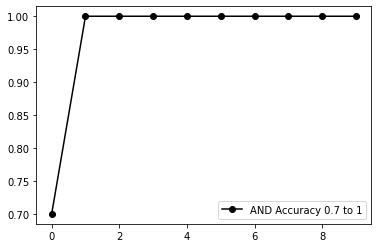

In [ ]:
line, = plt.plot(range(10),list(acc_and[0].values()),marker="o",color="black",label = "AND Accuracy 0.7 to 1")
plt.legend(handles=[line])

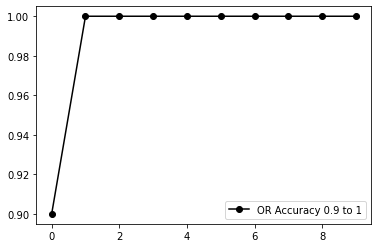

In [ ]:
line, = plt.plot(range(10),list(acc_or[0].values()),marker="o",color="black",label = "OR Accuracy 0.9 to 1")
plt.legend(handles=[line])

##Naive Bayes Classifier over Breast Cancer Dataset

In [10]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import load_breast_cancer

df = pd.DataFrame(load_breast_cancer().data,columns=load_breast_cancer().feature_names)
breast_cancer = load_breast_cancer()

X = load_breast_cancer().data
Y = load_breast_cancer().target


In [18]:
class NB_classifer(object):

    def __init__(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        self.num_examples = None
        self.num_features = None
        self.num_classes = None
        
    def get_params(self, X_train, y_train): 
        """
        Function to get the unique classes, number of classes and number of features in training data
        """
        num_examples, num_features = X_train.shape
        num_classes = len(np.unique(y_train))
        return num_examples, num_features, num_classes

    def get_stats_by_class(self, X_train , y_train): 
        """
        Get stats of dataset by the class
        """
        self.num_examples, self.num_features, self.num_classes = self.get_params(X_train, y_train)
        # dictionaries to store stats
        class_mean = {}
        class_var = {} 
        class_prior = {} 
        
        # loop through each class and get mean, variance and prior by class
        for cls in range(self.num_classes): 
            X_cls = X_train[y_train == cls]
            class_mean[str(cls)] = np.mean(X_cls, axis=0)
            class_var[str(cls)] = np.var(X_cls, axis=0)
            class_prior[str(cls)] = X_cls.shape[0] / self.num_examples
        return class_mean, class_var, class_prior

    def gaussian_density_function(self, X, mean, std, eps=1e-6): 
        const = -self.num_features/2 * np.log(2*np.pi) - 0.5 * np.sum(np.log(std + eps))
        probs = 0.5 * np.sum(np.power(X - mean, 2)/(std + eps), 1)
        return const - probs

    def class_probabilities(self, X, class_mean, class_var, class_prior):
        """
        calculate the probability of each class given the data
        """
        num_examples, num_features, num_classes = self.get_params(X, self.y_train)
        probs = np.zeros((num_examples, num_classes))
        for cls in range(num_classes): 
            prior = class_prior[str(cls)]
            probs_cls = self.gaussian_density_function(X, class_mean[str(cls)], class_var[str(cls)])
            probs[:, cls] = probs_cls + np.log(prior)
        return probs


    def predict(self, X_test): 
        class_mean, class_std, class_prior = self.get_stats_by_class(self.X_train, self.y_train)
        probs = self.class_probabilities(X_test, class_mean, class_std, class_prior)
        return np.argmax(probs, 1)


In [13]:
x_train,x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2)

In [19]:
clf = NB_classifer(x_train,y_train)
y_pred = clf.predict(x_test)

In [23]:
print("Accuracy of Custom Naive Bayes : %.2f" %(accuracy_score(y_test,y_pred)*100),"%")

Accuracy of Custom Naive Bayes : 91.23 %
